# Actividad

- **Nombres**: Santiago Andrés Serrano Vacca, Miguel Ángel Peña Ruiz, Ricardo Jorge Rodríguez Treviño, David Emiliano Mireles Cárdenas
- **Matrículas**: A01734988, A01366731, A00831595, A01633729 

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


#**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [16]:
from google.colab import drive
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')
%cd '/content/drive/My Drive/'

presion = pd.read_csv('SemanaTec/arte-analitica/data/presion.csv')
presion



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


,edad,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406
6,44,122.945012,93.051815
7,45,123.417437,93.167768
8,46,128.783079,89.546531
9,47,125.049072,93.523873


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión ( alta y baja) 


[Text(0, 0.5, 'Promedio de presión alta'), Text(0.5, 0, 'Edad')]

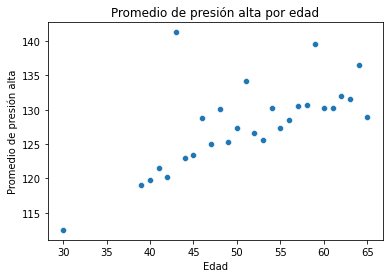

In [14]:
# alta
plot = sb.scatterplot(data=presion, x='edad', y='Average of ap_hi')
plot.set(title='Promedio de presión alta por edad')
plot.set(xlabel='Edad', ylabel='Promedio de presión alta')

[Text(0, 0.5, 'Promedio de presión baja'), Text(0.5, 0, 'Edad')]

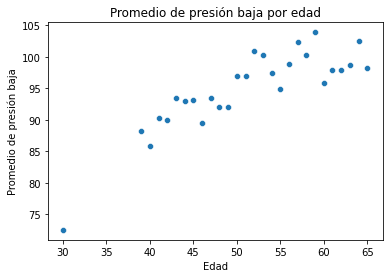

In [15]:
# baja
plot = sb.scatterplot(data=presion, x='edad', y='Average of ap_lo')
plot.set(title='Promedio de presión baja por edad')
plot.set(xlabel='Edad', ylabel='Promedio de presión baja')

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**.

¿Cuál es el valor de a y cuál es el valor de b para la presión alta y baja?

In [54]:
# presión alta
lm1 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm1.fit(presion[['edad']], presion['Average of ap_hi'])
print('Presión alta')
print('a: ', lm1.coef_)
print('b: ', lm1.intercept_)
print('R^2: ', lm1.score(presion[['edad']], presion['Average of ap_hi']), '\n')

Presión alta
a:  [0.47769703]
b:  103.39697409643658
R^2:  0.4590368035910293 



In [55]:
# presión baja
lm1 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm1.fit(presion[['edad']], presion['Average of ap_lo'])
print('Presión baja')
print('a: ', lm1.coef_)
print('b: ', lm1.intercept_)
print('R^2: ', lm1.score(presion[['edad']], presion['Average of ap_lo']), '\n')


Presión baja
a:  [0.60898106]
b:  63.726200409422745
R^2:  0.7129328807839572 



4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

Text(0, 0.5, 'Presión')

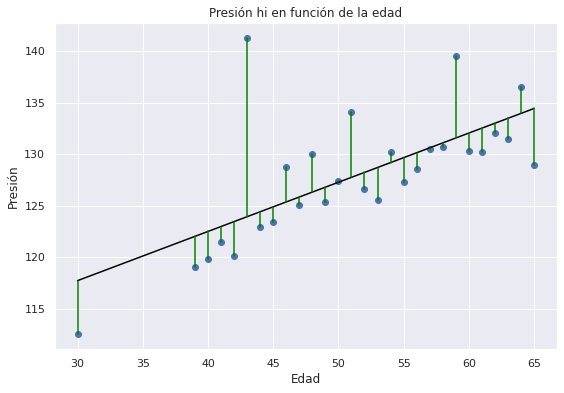

In [141]:
# alta
# presión alta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

xfit = np.linspace(30,65,28,1)
yfit = 0.47769703*xfit+103.39697409643658

x = presion['edad']
y = 0.47769703*presion['edad']+103.39697409643658

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

plt.figure(figsize=(9,6))
plt.scatter(data=presion, x='edad', y='Average of ap_hi')
plt.plot(xfit, yfit, color="black")
plt.plot(np.vstack([x,x]), np.vstack([y, presion['Average of ap_hi']]), color="green");
plt.title("Presión hi en función de la edad")
plt.xlabel("Edad")
plt.ylabel("Presión")

Text(0, 0.5, 'Presión')

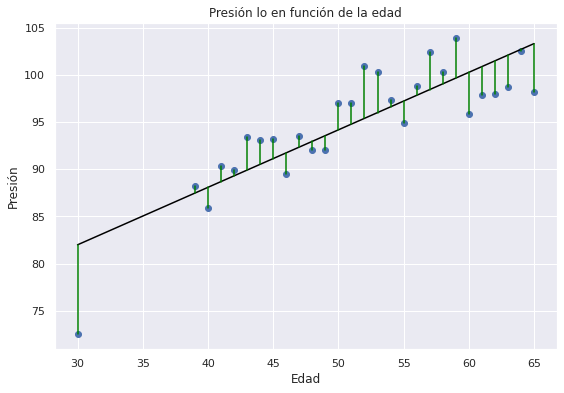

In [142]:
# baja
# presión baja
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

xfit = np.linspace(30,65,28,1)
yfit = 0.60898106*xfit+63.726200409422745

x = presion['edad']
y = 0.60898106*presion['edad']+63.726200409422745

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

plt.figure(figsize=(9,6))
plt.scatter(data=presion, x='edad', y='Average of ap_lo')
plt.plot(xfit, yfit, color="black")
plt.plot(np.vstack([x,x]), np.vstack([y, presion['Average of ap_lo']]), color="green");
plt.title("Presión lo en función de la edad")
plt.xlabel("Edad")
plt.ylabel("Presión")

5. ¿Cuál es la presión arterial hi y lo esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [72]:
edad_calcular=76

def presionLo(edad):
  return 0.60898106*edad+63.726200409422745

presionLo(edad_calcular)

110.00876096942275

In [73]:
def presionHi(edad):
  return 0.47769703*edad+103.39697409643658

presionHi(edad_calcular)

139.70194837643658

6. Conclusiones 

**A01734988 | Santiago Andrés Serrano Vacca:** Es posible ver, gracias a este análisis de datos, que las presiones arteriales altas y bajas dependen en gran medida de la edad de un paciente. Sin embargo, también hay otros factores a tener en cuenta (que no entran dentro de este modelo), como por ejemplo si un paciente sufre de hipertensión o alguna comorbilidad. De todos modos, es de enorme utilidad saber que, con tan solo conocer la edad de un paciente, deberíamos poder determinar qué presión arterial debería tener. Es posible que, de tener los factores mencionados, se pueda generar una función muchísimo más precisa, con una R^2 aún más elevada.

**Miguel Angel Peña Ruiz - A01366731:** En el primer caso fue una correlación entre la edad y la presión arterial, a través de una muestra de datos de diferentes personas de diferentes edades, se utilizó para crear una ecuación lineal que permitiera sacar la presión arterial conociendo la edad solamente, este como vemos en las comparaciones gráficas tiene un  pequeño índice de error y sirve cómo método de predicción para edades que no teníamos datos. Pude observar también como combinar la estadística con la programación como herramienta para hacerla más sencilla y con funciones más poderosas que hacer los cálculos manualmente.

**A00831595 - Ricardo Jorge Rodríguez Treviño:** El modelo lineal es de mucha utilidad para realizar una correcta estimación de cualquier dato en una determinada serie, sin embargo, debido a que es precisamente una estimación, es necesario tomar en cuenta el índice del posible error al que nos enfrentamos, como lo mostrado anteriormente. La mejor manera de realizar esto es posiblemente tratanto de comprender la naturaleza de los datos, así como el contexto bajo el cual fueron obtenidos, generando así funciones o ecuaciones con un grado bastante significativo de utilidad.

**A01633729 - David Emiliano Mireles Cárdenas:** Los resultados para los modelos de la presión arterial predecidla por la edad sugieren que existen variables que no se están tomando en cuenta dado que la determinación del modelo no es alta. Se pueden observar ciertos puntos en particular que están muy alejados de la línea de la regresión especialmente en el modelo de la presión más alta. Quizás esto se deba a fenómenos médicos como alguna condición genética, sobrepeso o algo por el estilo.


#Opcion: **Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

In [92]:
insur = pd.read_csv('SemanaTec/arte-analitica/data/insurance.csv')
insur.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [95]:
insur['fuma'] = np.where(insur['smoker'] == 'yes', 1, 0)
conditions = [(insur['region'] == 'northeast'), 
              (insur['region'] == 'southeast'),
              (insur['region'] == 'southwest'),
              (insur['region'] == 'northwest')]
values = [0, 1, 2, 3]
insur['regiones'] = np.select(conditions, values)
insur['sexo'] = np.where(insur['sex'] == 'female', 1, 0)
insur.head(10)

,age,sex,bmi,children,smoker,region,charges,fuma,regiones,sexo
0,19,female,27.900,0,yes,southwest,16884.92400,1,2,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,3,0
4,32,male,28.880,0,no,northwest,3866.85520,0,3,0
5,31,female,25.740,0,no,southeast,3756.62160,0,1,1
6,46,female,33.440,1,no,southeast,8240.58960,0,1,1
7,37,female,27.740,3,no,northwest,7281.50560,0,3,1
8,37,male,29.830,2,no,northeast,6406.41070,0,0,0
9,60,female,25.840,0,no,northwest,28923.13692,0,3,1


2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
fuma        0.787251
regiones   -0.050226
sexo       -0.057292
Name: charges, dtype: float64


[Text(0.5, 1.0, 'Sexo vs. Costo')]

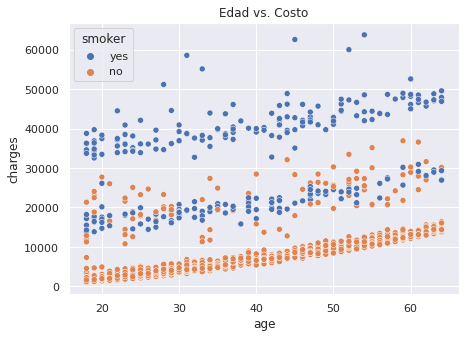

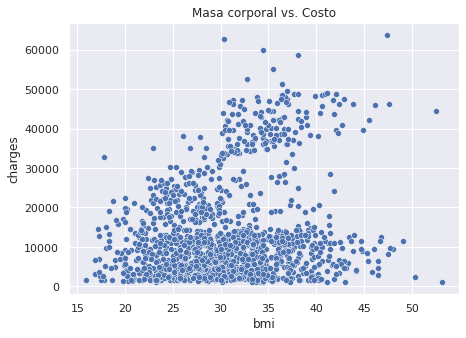

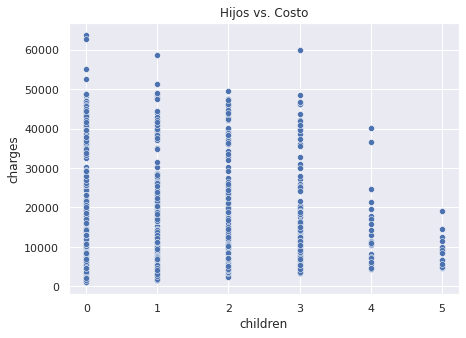

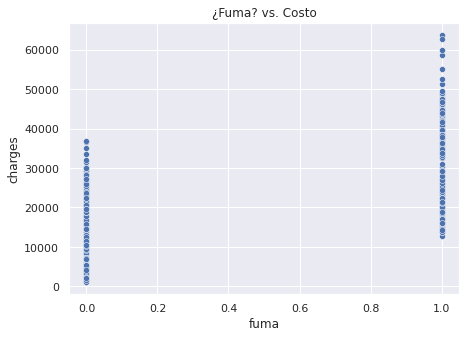

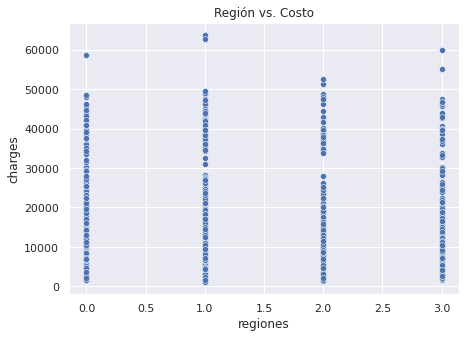

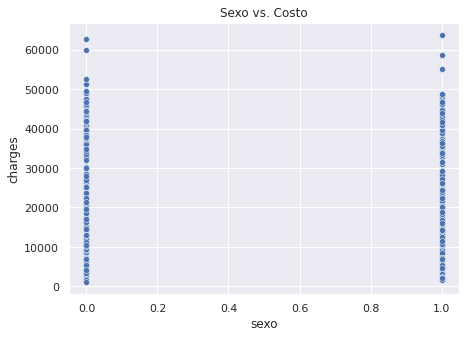

In [138]:
print(insur.corr()['charges'])

fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=insur, x='age', y='charges', hue='smoker').set(title='Edad vs. Costo')

fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=insur, x='bmi', y='charges').set(title='Masa corporal vs. Costo')

fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=insur, x='children', y='charges').set(title='Hijos vs. Costo')

fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=insur, x='fuma', y='charges').set(title='¿Fuma? vs. Costo')

fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=insur, x='regiones', y='charges').set(title='Región vs. Costo')

fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=insur, x='sexo', y='charges').set(title='Sexo vs. Costo')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

Concluímos que la variable con mayor efecto significativo en el costo del seguro es si el cliente fuma o no, seguida por la edad, aunque en una menor medida. La variable que menos influye es la región, aunque si cambiamos el orden de las regiones (es decir, asignar el valor de 0 a una región diferente, el valor de 1 a una región diferente, etc.), el coeficiente de correlación cambiará ligeramente.

También vemos que, en el caso de la función que relaciona costo con edad, se crearon 3 grupos de datos. Estos grupos de datos se generaron a causa de la variable que más influye, es decir, si fuma o no el cliente.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

In [127]:
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

def hallar_datos(vars, titulo):
    lm = LinearRegression()
    # La variable X la ponemos con doble corchete!
    lm.fit(insur[vars], insur['charges'])
    print(titulo)
    print('beta_0: ', lm.intercept_)
    print('betas: ', lm.coef_)
    print('Score: ', lm.score(insur[vars], insur['charges']))
    if len(vars) > 1:
        print('Score ajustado:', score_adj(insur[vars], insur['charges'], lm), '\n')
    else:
        print()

hallar_datos(['age'], 'Edad vs Costo')
hallar_datos(['bmi'], 'Masa corporal vs Costo')
hallar_datos(['children'], 'Niños vs Costo')
hallar_datos(['fuma'], '¿Fuma? vs Costo')
hallar_datos(['regiones'], 'Región vs Costo')
hallar_datos(['sexo'], 'Sexo vs Costo')

Edad vs Costo
beta_0:  3165.885006063021
betas:  [257.72261867]
Score:  0.08940589967885804

Masa corporal vs Costo
beta_0:  1192.937208961148
betas:  [393.8730308]
Score:  0.03933913991786275

Niños vs Costo
beta_0:  12522.495549644098
betas:  [683.08938248]
Score:  0.004623758854459203

¿Fuma? vs Costo
beta_0:  8434.2682978562
betas:  [23615.96353368]
Score:  0.6197648148218988

Región vs Costo
beta_0:  14088.745390518741
betas:  [-550.48584301]
Score:  0.0025226707691909933

Sexo vs Costo
beta_0:  13956.751177721893
betas:  [-1387.17233389]
Score:  0.003282380391360862



5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?



1.   ¿Fuma? vs. Costo
2.   Edad vs. Costo
3. Masa corporal vs. Costo
4. Niños vs. Costo
5. Sexo vs. Costo
6. Región vs. Costo



6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

In [133]:
hallar_datos(['age', 'children', 'regiones'], "Edad, Niños y Región vs. Costo")
hallar_datos(['fuma', 'age'], "Fuma y Edad vs. Costo")
hallar_datos(['fuma', 'age', 'bmi'], "Fuma, Edad y Masa corporal vs. Costo")
hallar_datos(['age', 'children', 'regiones', 'fuma', 'bmi', 'sexo'], "Edad, Niños, Región, ¿Fuma?, Masa Corporal y Sexo vs. Costo")
hallar_datos(['regiones', 'sexo'], "Sexo y Regiones vs. Costo")

Edad, Niños y Región vs. Costo
beta_0:  3477.9425852574423
betas:  [ 255.74320281  576.03582763 -581.99464652]
Score:  0.09528541418900906
Score ajustado: 0.09325082366619575 

Fuma y Edad vs. Costo
beta_0:  -2391.6263593585427
betas:  [23855.30481666   274.87118587]
Score:  0.72140082605772
Score ajustado: 0.7209834490181062 

Fuma, Edad y Masa corporal vs. Costo
beta_0:  -11676.830425187785
betas:  [23823.68449531   259.54749155   322.61513282]
Score:  0.7474771588119513
Score ajustado: 0.7469092663655015 

Edad, Niños, Región, ¿Fuma?, Masa Corporal y Sexo vs. Costo
beta_0:  -12008.370945792605
betas:  [  257.78039376   477.78663538   -98.27183477 23811.62382151
   321.38134389   129.50258634]
Score:  0.7498023930899099
Score ajustado: 0.7486745300985796 

Sexo y Regiones vs. Costo
beta_0:  14760.856478095639
betas:  [ -544.66451208 -1375.92637827]
Score:  0.005751763566093637
Score ajustado: 0.004262253099525992 



** 7. ¿Cuál modelo es el que nos conviene elegir?**


El modelo que más nos conviene elegir es el que relaciona las funciones "fuma" y "edad" con el costo, ya que, a pesar de que existen algunos que tienen un coeficiente de determinación mayor, deben tomarse en cuenta algunos otros factores, como el número de variables que no son lo suficientemente significativas.

8. Conclusiones 

**A01734988 | Santiago Andrés Serrano Vacca:** Me llama mucho la atención el hecho de que, al pasar una variable cualitativa (smoker) a cuantitativa (fuma), pudimos hallar un coeficiente de correlación muy importante. También es muy relevante notar el hecho de que, por más que agregar muchas variables a un modelo de regresión lineal múltiple pueda resultar en una R^2 más alta, no es conveniente tener tantas variables puesto que complican la recolección de datos y la aplicación del modelo en cuestión. También puedo evidenciar que el uso de funciones en Python (y en programación en general) es de una utilidad gigantezca, ya que permite ahorrar muchísimo código. Ya para terminar, pienso que no tiene mucho sentido pasar una variable como *region* a cuantitativa, ya que no existe alguna jerarquía de regiones (o algo similar) como para que tenga sentido que, por ejemplo una lleve el número 3 y la otra el número 2. Pienso que para analizar la variable *region* habría sido muchísimo más util usar el parametro *hue*, que cambiaría el color de los puntos en la gráfica dependiendo de la región.

**Miguel Angel Peña Ruiz - A01366731** - En este segundo caso se tuvo una tabla con más de dos relaciones entre variables, necesitabamos encontrar cuál par era el más significativo y realmente fueran codependientes. Para ello se utilizó el coeficiente de determinación, igualmente a través de la programación y se obtuvo que el más significativo fue una pregunta de si o no sobre si fumas o no. También se crearon esta vez diferentes modelos lineales múltiples que también permitía observar la relación entre más de dos variables. Esto demuestra como con términos estadísticos que puede interpretar datos para crear información para una toma de decisiones más acertada, que por ejemplo en este caso trata sobre los precios que se debe otorgar a las diferentes personas dependiendo de sus características.

**A00831595 - Ricardo Jorge Rodríguez Treviño:** En sí, utilizar el coeficiente de determinación como medida de la utilidad de un cierto modelo no es siempre lo más útil, de manera que, utilizar algunas otras alternativas de solución será primordial, tal como es el caso del de determinación ajustado, que si sabemos de la existencia de un conjunto de variables, nos permitirá medir qué tanto afecta cada una de ellas (siendo independientes) en otra particular (siendo esta dependiente), aunque también debe tomarse en cuenta el número útil de estas, por lo que entre menor sea la cantidad, se tendrá una mayor efectividad.

**A01633729 - David Emiliano Mireles Cárdenas:** El modelo que solo toma en cuenta si la persona es fumadora o no y la edad para predecir el costo tiene un coeficiente de determinación de alrededor de 0.72. Incluir otras variables como el sexo, la región geográfica y cantidad de hijos mejora el coeficiente a alrededor de 0.74. Sin embargo, al observar la ecuación de la regresión, se observa que los coeficientes de estas variables son muy bajos. Tomando en cuenta también que la diferencia en el coeficiente de determinación es mínima, se pueden descartar estar variables. Una mejora para el modelo sería determinar si la mejoría en la determinación gracias a estas variables es aleatoria. Estudios futuros podrían analizar más a profundidad las diferencias entre fumadores y los efectos de sus diferencias en los costos, ya que variables como la cantidad de cigarros fumados por día, la edad a la que se comenzó a fumar o la cantidad de tiempo que se tiene fumando pueden tener diferencias en los cuerpos de los fumadores.